In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def train_df(tr_path):
    data = []
    for tumor_type in os.listdir(tr_path):
        tumor_dir = os.path.join(tr_path, tumor_type)
        if os.path.isdir(tumor_dir):
            images_dir = os.path.join(tumor_dir, 'images')
            labels_dir = os.path.join(tumor_dir, 'labels')
            
            if os.path.isdir(images_dir) and os.path.isdir(labels_dir):
                for image_file in os.listdir(images_dir):
                    image_path = os.path.join(images_dir, image_file)
                    label_file = os.path.splitext(image_file)[0] + '.txt'
                    label_path = os.path.join(labels_dir, label_file)
                    
                    data.append({'Image Path': image_path, 'Label Path': label_path, 'Tumor Type': tumor_type})

    tr_df = pd.DataFrame(data)
    return tr_df


In [5]:
def test_df(tr_path):
    data = []
    for tumor_type in os.listdir(tr_path):
        tumor_dir = os.path.join(tr_path, tumor_type)
        if os.path.isdir(tumor_dir):
            images_dir = os.path.join(tumor_dir, 'images')
            labels_dir = os.path.join(tumor_dir, 'labels')
            
            if os.path.isdir(images_dir) and os.path.isdir(labels_dir):
                for image_file in os.listdir(images_dir):
                    image_path = os.path.join(images_dir, image_file)
                    label_file = os.path.splitext(image_file)[0] + '.txt'
                    label_path = os.path.join(labels_dir, label_file)
                    
                    data.append({'Image Path': image_path, 'Label Path': label_path, 'Tumor Type': tumor_type})

    ts_df = pd.DataFrame(data)
    return ts_df

In [8]:
tr_df = train_df('MRI-Brain-Tumor-Bounding-Boxes/Train')
tr_df

,Image Path,Label Path,Tumor Type
0,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,Pituitary
1,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,Pituitary
2,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,Pituitary
3,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,Pituitary
4,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train/Pituitary...,Pituitary
...,...,...,...
4732,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,Meningioma
4733,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,Meningioma
4734,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,Meningioma
4735,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,MRI-Brain-Tumor-Bounding-Boxes/Train/Meningiom...,Meningioma


In [9]:
ts_df = test_df('MRI-Brain-Tumor-Bounding-Boxes/Val')
ts_df

,Image Path,Label Path,Tumor Type
0,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/i...,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/l...,Pituitary
1,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/i...,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/l...,Pituitary
2,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/i...,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/l...,Pituitary
3,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/i...,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/l...,Pituitary
4,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/i...,MRI-Brain-Tumor-Bounding-Boxes/Val/Pituitary/l...,Pituitary
...,...,...,...
507,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,Meningioma
508,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,Meningioma
509,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,Meningioma
510,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,MRI-Brain-Tumor-Bounding-Boxes/Val/Meningioma/...,Meningioma


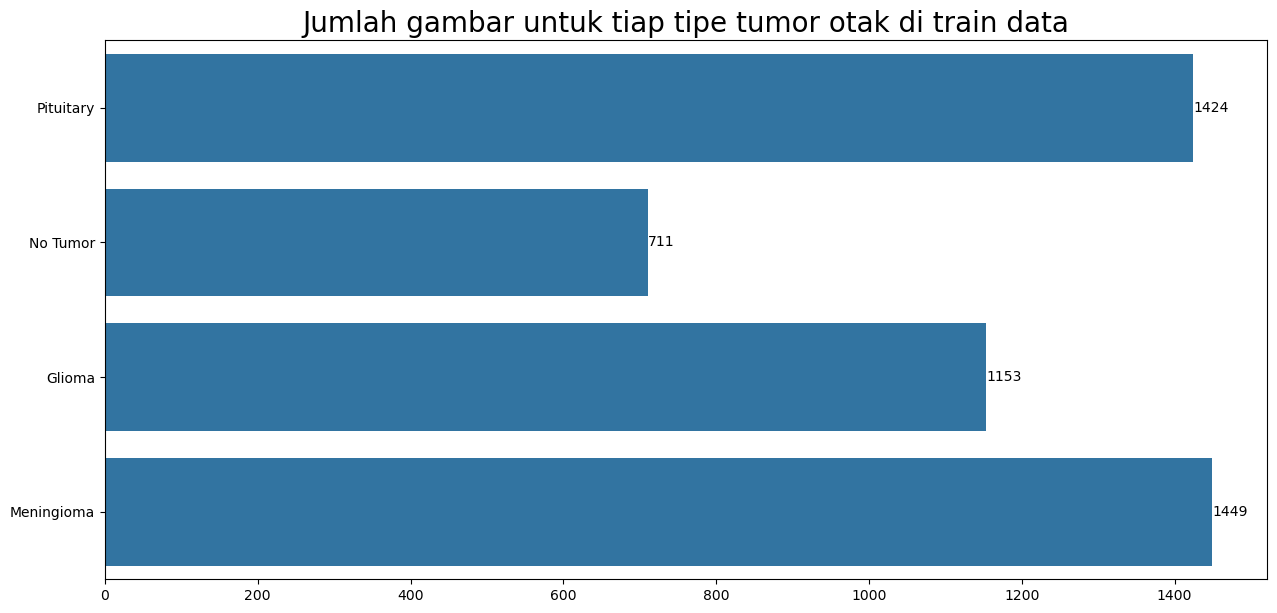

In [33]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Tumor Type'])

plt.xlabel('')
plt.ylabel('')
plt.title('Jumlah gambar untuk tiap tipe tumor otak di train data', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

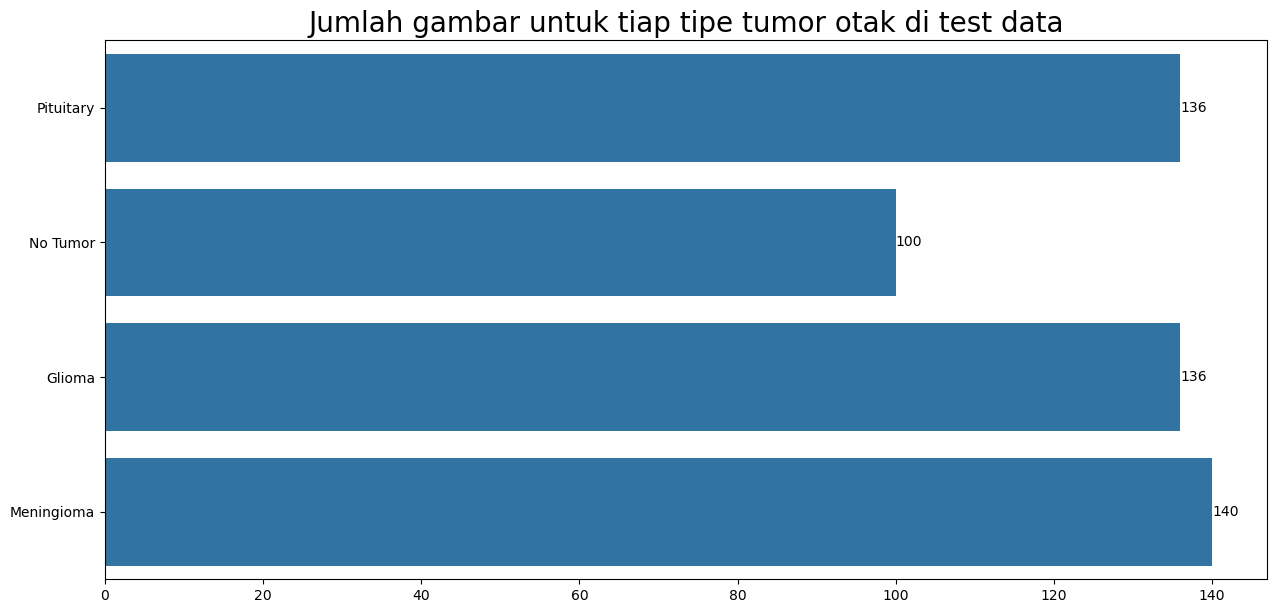

In [34]:
plt.figure(figsize=(15,7))

unique_classes = tr_df['Tumor Type'].unique()
palette = sns.color_palette("husl", len(unique_classes))

ax = sns.countplot(data=ts_df , y=ts_df['Tumor Type'])

plt.xlabel('')
plt.ylabel('')
plt.title('Jumlah gambar untuk tiap tipe tumor otak di test data', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [17]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Image Path',
                                  y_col='Tumor Type', batch_size=batch_size,
                                  target_size=img_size)


ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Image Path',
                                  y_col='Tumor Type', batch_size=16,
                                  target_size=img_size, shuffle=True)

Found 4737 validated image filenames belonging to 4 classes.
Found 512 validated image filenames belonging to 4 classes.


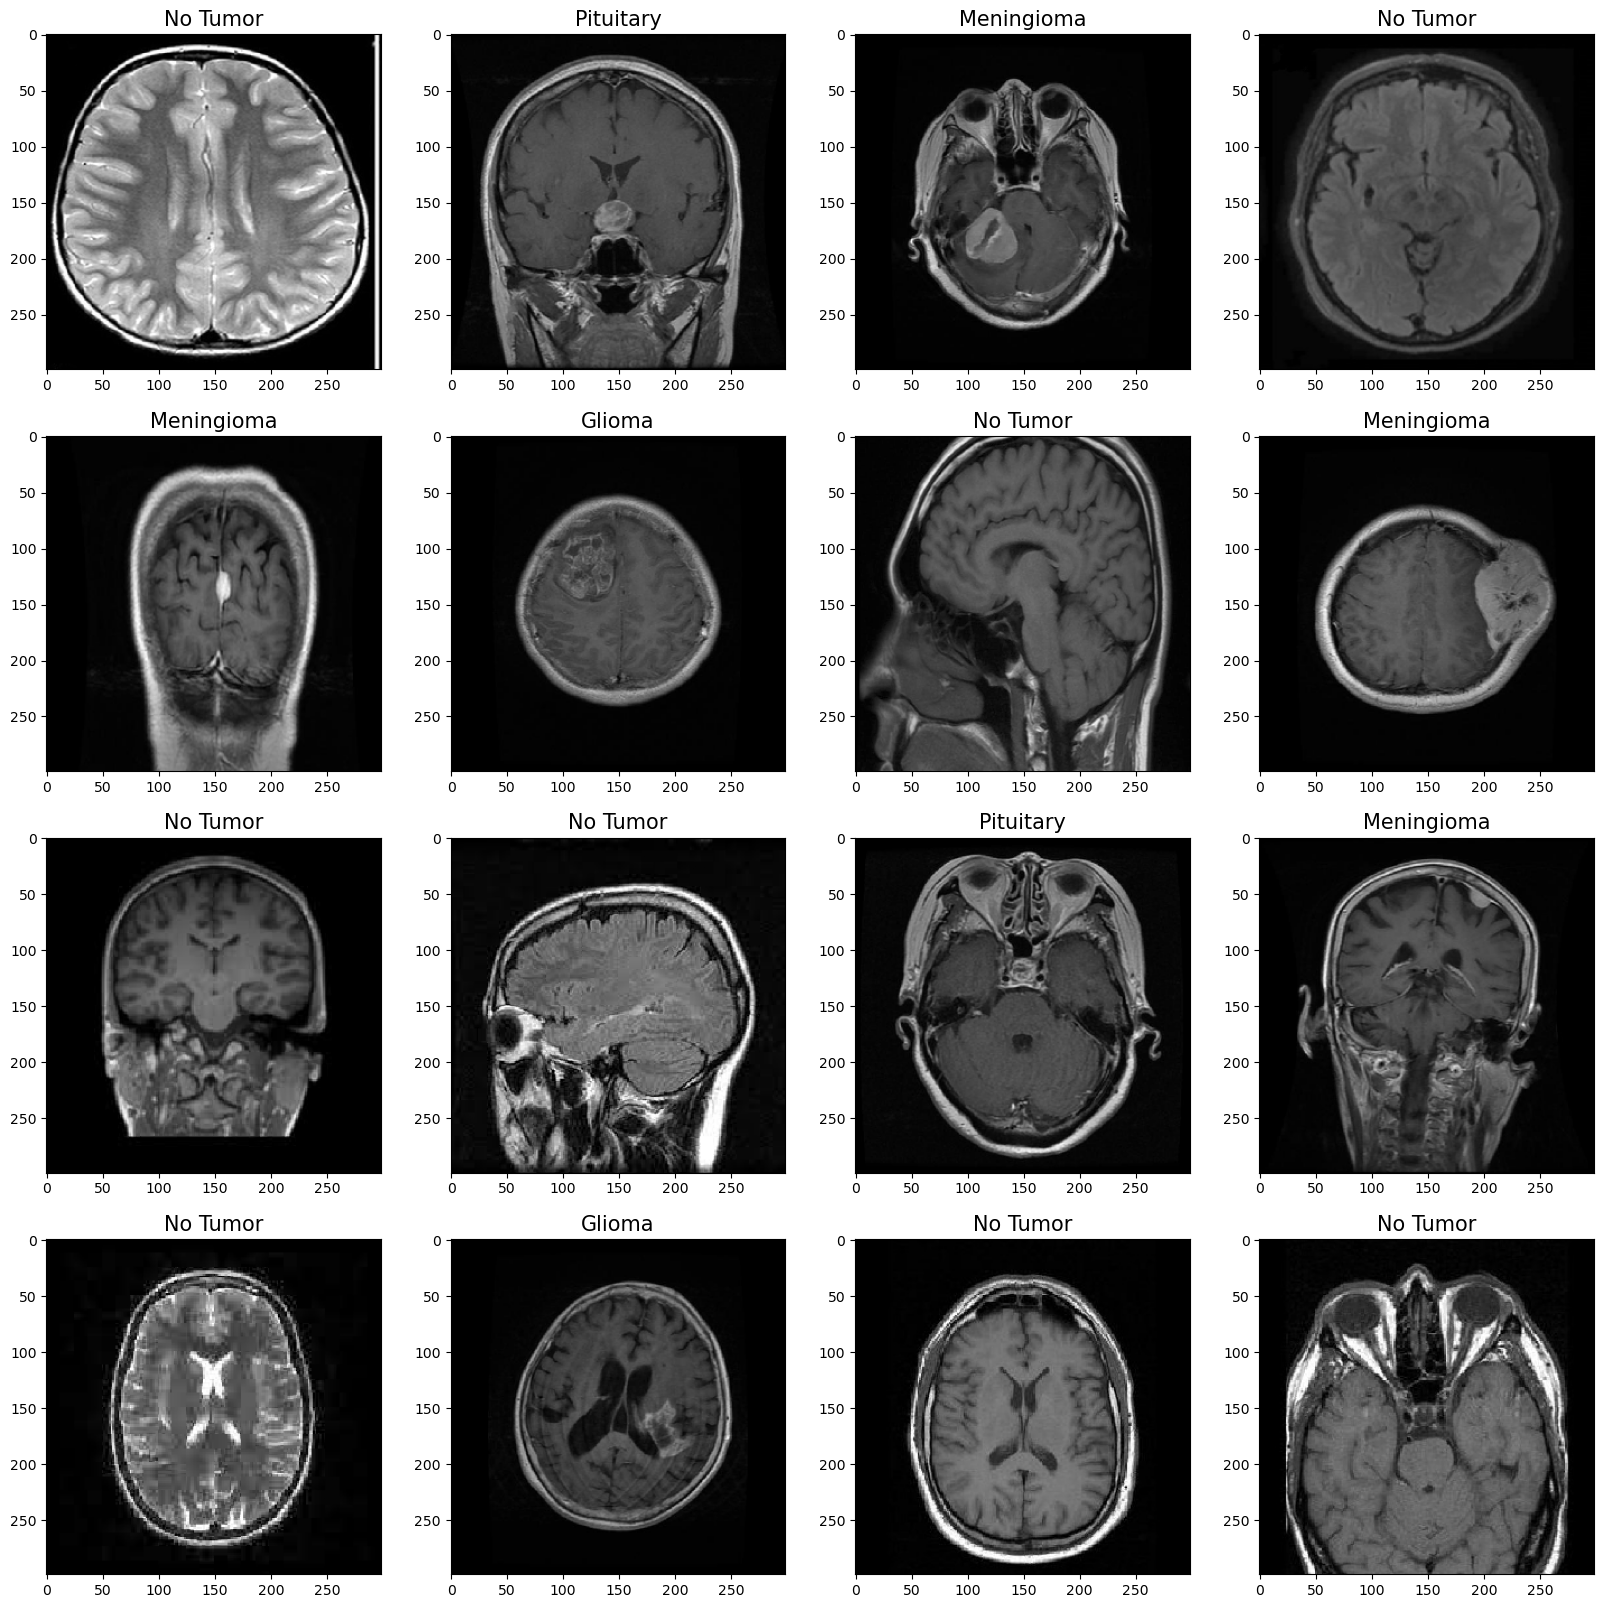

In [18]:
classes = list(tr_gen.class_indices.keys())

images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [29]:
dataset_yaml_content = """
path: /Volumes/Mac HD Data/INFORMATIKA/FPKcv/MRI-Brain-Tumor-Bounding-Boxes

train: Train
val: Val

nc: 4
names: ['Glioma','Meningioma', 'No Tumor', 'Pituitary']
"""

with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml_content)

In [21]:
!pip install ultralytics

In [22]:
from ultralytics import YOLO

yolo_model = YOLO('yolov8n.pt')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:31<00:00, 205kB/s]


In [30]:
yolo_model.train(data='dataset.yaml', epochs=20, imgsz=299, project='DetectTumor', name='yolo_train')

Ultralytics 8.3.107 🚀 Python-3.12.7 torch-2.6.0 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=299, save=True, save_period=-1, cache=False, device=None, workers=8, project=DetectTumor, name=yolo_train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscr

train: Scanning /Volumes/Mac HD Data/INFORMATIKA/FPKcv/MRI-Brain-Tumor-Bounding-Boxes/Train/Glioma/labels... 4737 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [00:00<00:00, 4847.23it/s]


train: New cache created: /Volumes/Mac HD Data/INFORMATIKA/FPKcv/MRI-Brain-Tumor-Bounding-Boxes/Train/Glioma/labels.cache


val: Scanning /Volumes/Mac HD Data/INFORMATIKA/FPKcv/MRI-Brain-Tumor-Bounding-Boxes/Val/Glioma/labels... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:00<00:00, 4923.78it/s]

val: New cache created: /Volumes/Mac HD Data/INFORMATIKA/FPKcv/MRI-Brain-Tumor-Bounding-Boxes/Val/Glioma/labels.cache


Plotting labels to DetectTumor/yolo_train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to DetectTumor/yolo_train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.085      1.964      1.087          0        320: 100%|██████████| 297/297 [09:29<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:32<00:00,  2.01s/it]

                   all        512        554      0.815      0.768      0.848      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.092      1.198      1.086          2        320: 100%|██████████| 297/297 [10:54<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:30<00:00,  1.93s/it]

                   all        512        554      0.809      0.783      0.866      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/20         0G      1.098      1.064      1.088          1        320: 100%|██████████| 297/297 [10:11<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:32<00:00,  2.02s/it]

                   all        512        554      0.795      0.844       0.88      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      1.064     0.9536      1.071          1        320: 100%|██████████| 297/297 [10:45<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:30<00:00,  1.93s/it]

                   all        512        554      0.829       0.79      0.852      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G       1.02     0.8535      1.054          5        320: 100%|██████████| 297/297 [09:30<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.60s/it]

                   all        512        554      0.855      0.815       0.89      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G     0.9937     0.8277      1.043          1        320: 100%|██████████| 297/297 [08:22<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26<00:00,  1.66s/it]

                   all        512        554      0.887      0.836      0.891      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G     0.9746     0.7525      1.037          1        320: 100%|██████████| 297/297 [12:39<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:00<00:00,  3.77s/it]

                   all        512        554      0.897      0.876      0.921       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.9518     0.7424      1.022          0        320: 100%|██████████| 297/297 [18:54<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:46<00:00,  2.91s/it]

                   all        512        554      0.875      0.855      0.905      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G     0.9494     0.7009      1.024          2        320: 100%|██████████| 297/297 [14:54<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:37<00:00,  2.35s/it]

                   all        512        554       0.88      0.876      0.922      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G     0.9085     0.6655      1.009          2        320: 100%|██████████| 297/297 [12:44<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]

                   all        512        554       0.92      0.879      0.938      0.732
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G     0.8765     0.6002     0.9863          1        320: 100%|██████████| 297/297 [13:05<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:37<00:00,  2.32s/it]

                   all        512        554      0.941      0.888      0.942      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/20         0G     0.8519     0.5661     0.9792          1        320: 100%|██████████| 297/297 [12:43<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:36<00:00,  2.28s/it]

                   all        512        554      0.932      0.891      0.944      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G     0.8333     0.5281     0.9684          1        320: 100%|██████████| 297/297 [12:35<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:35<00:00,  2.20s/it]

                   all        512        554      0.945      0.914      0.948       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G     0.8152     0.5125     0.9623          1        320: 100%|██████████| 297/297 [12:17<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]

                   all        512        554       0.92      0.908      0.941      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G     0.7987     0.4999     0.9546          1        320: 100%|██████████| 297/297 [11:33<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]

                   all        512        554      0.924      0.924      0.948      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G     0.7922     0.4778     0.9496          1        320: 100%|██████████| 297/297 [12:51<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:38<00:00,  2.38s/it]

                   all        512        554      0.943      0.922      0.952      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G     0.7719     0.4672     0.9409          1        320: 100%|██████████| 297/297 [12:07<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]

                   all        512        554      0.928      0.932       0.95      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G     0.7682     0.4536     0.9404          1        320: 100%|██████████| 297/297 [12:22<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:34<00:00,  2.18s/it]

                   all        512        554      0.942      0.927      0.951      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G      0.745     0.4335     0.9378          1        320: 100%|██████████| 297/297 [11:57<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:31<00:00,  1.99s/it]

                   all        512        554      0.932      0.932      0.951      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G     0.7349     0.4176     0.9298          1        320: 100%|██████████| 297/297 [12:27<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:44<00:00,  2.76s/it]

                   all        512        554      0.938      0.924      0.952      0.779



20 epochs completed in 4.244 hours.
Optimizer stripped from DetectTumor/yolo_train2/weights/last.pt, 6.2MB
Optimizer stripped from DetectTumor/yolo_train2/weights/best.pt, 6.2MB

Validating DetectTumor/yolo_train2/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.12.7 torch-2.6.0 CPU (Apple M2)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:46<00:00,  2.92s/it]


                   all        512        554      0.939      0.925      0.952      0.779
                Glioma        135        153      0.914      0.836      0.905      0.725
            Meningioma        140        142      0.968      0.979      0.991      0.832
              No Tumor         98         98      0.976          1      0.977      0.832
             Pituitary        154        161      0.899      0.887      0.934      0.726
Speed: 0.4ms preprocess, 86.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to DetectTumor/yolo_train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x16264bd10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04